In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
!pip install wordcloud

In [2]:
# Load the dataset
twitter_data = pd.read_csv('twitter.csv')

In [3]:
# Display the first few rows and the structure of the dataset
display(twitter_data.head())
display(twitter_data.info())

,Tweet ID,Entity,Sentiment,Tweet content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet ID       74682 non-null  int64 
 1   Entity         74682 non-null  object
 2   Sentiment      74682 non-null  object
 3   Tweet content  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


None

In [4]:
# Check for missing values
print(twitter_data.isnull().sum())

Tweet ID           0
Entity             0
Sentiment          0
Tweet content    686
dtype: int64


In [5]:
# Drop rows where tweet content is missing
twitter_data.dropna(subset=['Tweet content'], inplace=True)  

In [6]:
#remove duplicates
twitter_data.drop_duplicates(subset=['Tweet ID'], inplace=True)

In [7]:
# Display sentiment counts to get a sense of distribution
sentiment_counts = twitter_data['Sentiment'].value_counts()
print(sentiment_counts)

Negative      3757
Positive      3472
Neutral       3053
Irrelevant    2165
Name: Sentiment, dtype: int64


### Sentiment Distribution Visualization

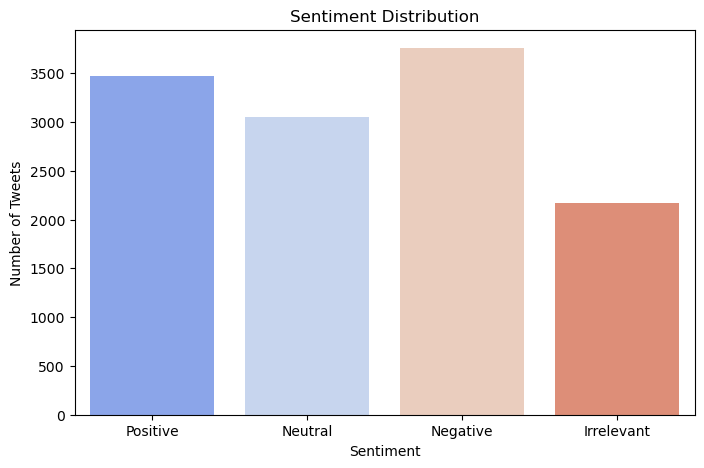

In [8]:
# Plot sentiment distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=twitter_data, x='Sentiment', palette='coolwarm')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()

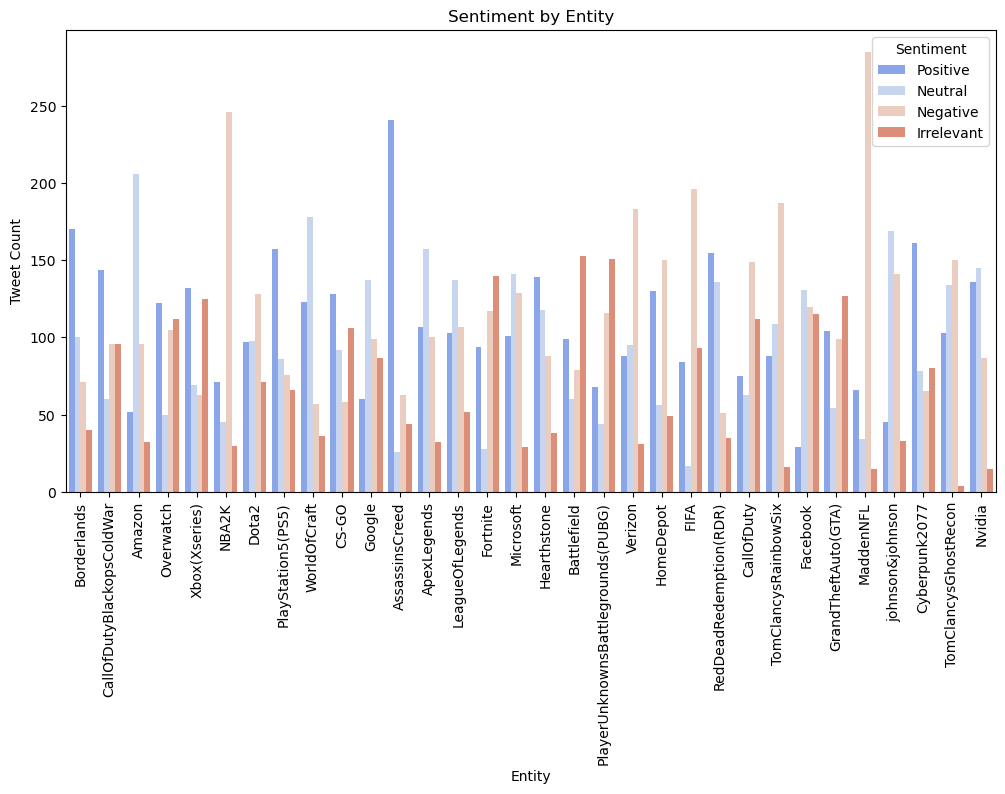

In [9]:
# Sentiment by entity
plt.figure(figsize=(12, 6))
sns.countplot(data=twitter_data, x='Entity', hue='Sentiment', palette='coolwarm')
plt.title('Sentiment by Entity')
plt.xlabel('Entity')
plt.ylabel('Tweet Count')
plt.xticks(rotation=90)
plt.show()

### Entity-Specific Sentiment Analysis

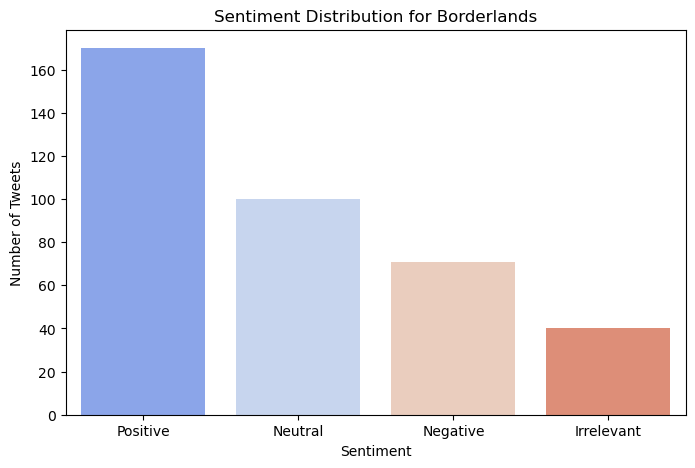

In [10]:
# Filter tweets related to 'Borderlands'
borderlands_tweets = twitter_data[twitter_data['Entity'] == 'Borderlands']

# Plot sentiment by entity
plt.figure(figsize=(8, 5))
sns.countplot(data=borderlands_tweets, x='Sentiment', palette='coolwarm')
plt.title('Sentiment Distribution for Borderlands')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()

### Word Cloud for Sentiment

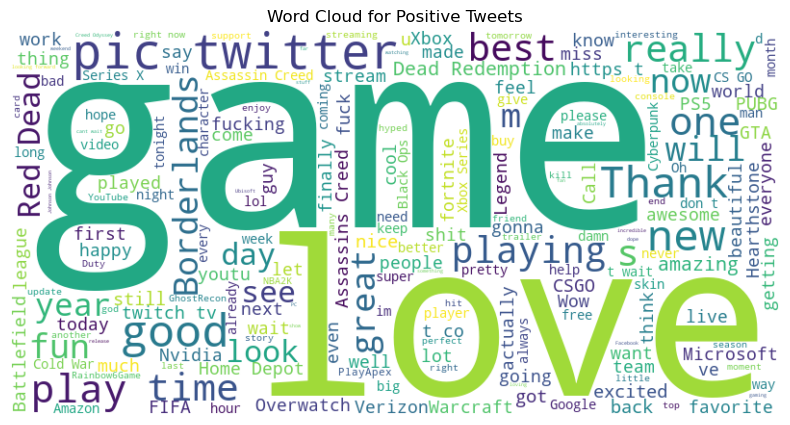

In [11]:

# Create a word cloud for positive tweets
positive_words = ' '.join(twitter_data[twitter_data['Sentiment'] == 'Positive']['Tweet content'])
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Tweets')
plt.show()

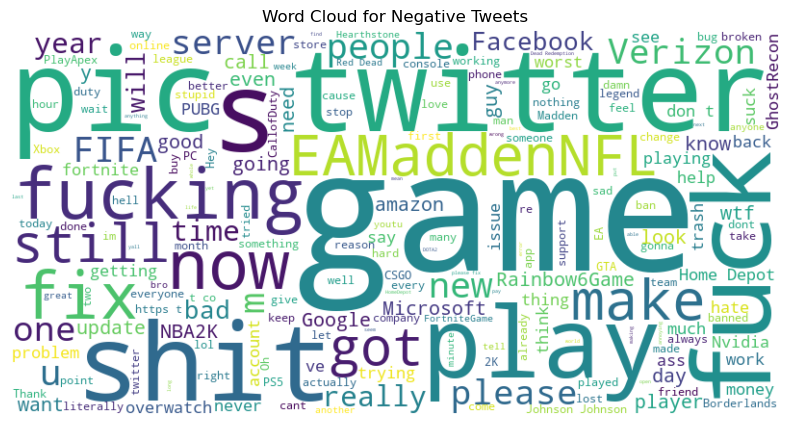

In [12]:
# Create a word cloud for negative tweets
positive_words = ' '.join(twitter_data[twitter_data['Sentiment'] == 'Negative']['Tweet content'])
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Tweets')
plt.show()

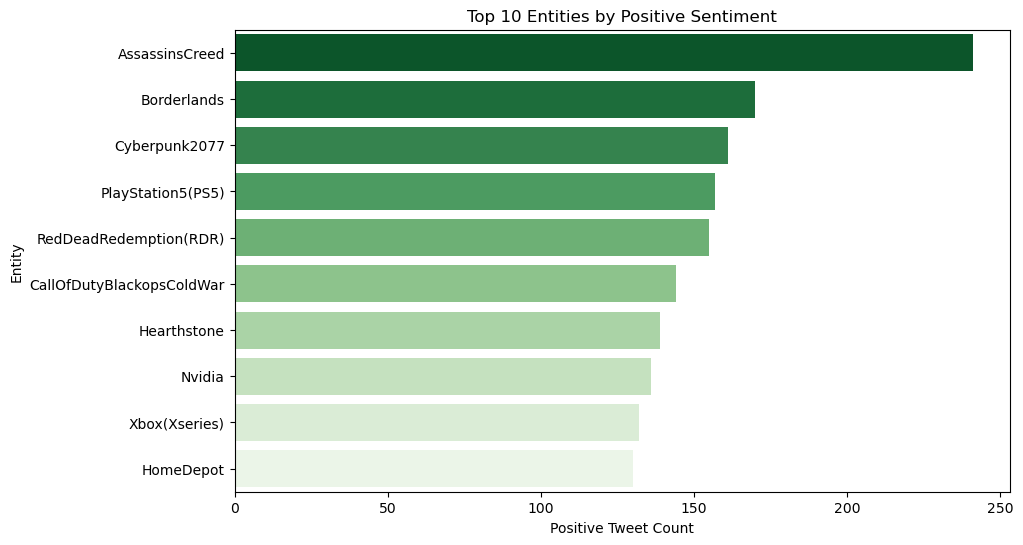

In [13]:
# Filter positive tweets
positive_data = twitter_data[twitter_data['Sentiment'] == 'Positive']

# Count the number of positive tweets per entity
positive_counts = positive_data['Entity'].value_counts().nlargest(10)

# Plot the top 10 entities with the most positive tweets
plt.figure(figsize=(10, 6))
sns.barplot(x=positive_counts.values, y=positive_counts.index, palette='Greens_r')
plt.title('Top 10 Entities by Positive Sentiment')
plt.xlabel('Positive Tweet Count')
plt.ylabel('Entity')
plt.show()

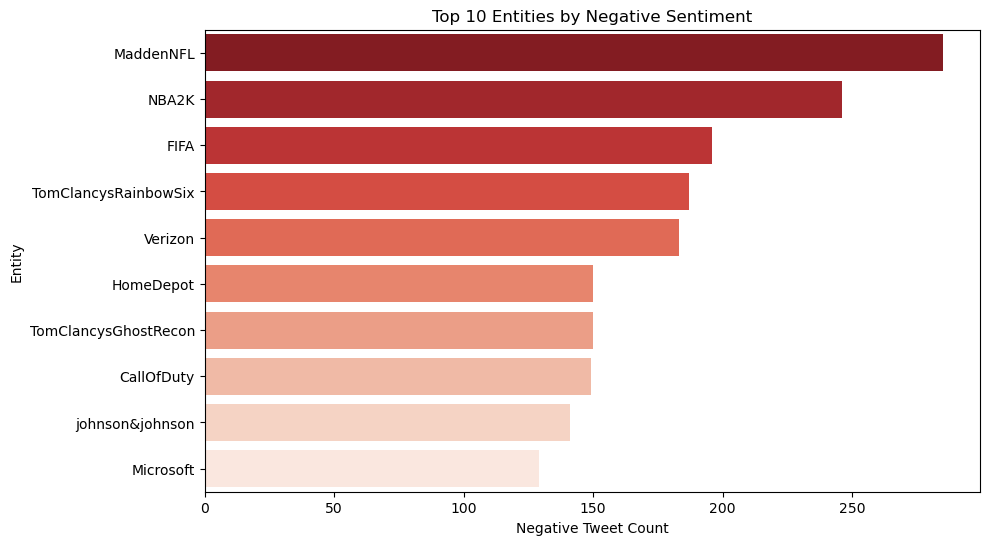

In [14]:
# Filter negative tweets
negative_data = twitter_data[twitter_data['Sentiment'] == 'Negative']

# Count the number of negative tweets per entity
negative_counts = negative_data['Entity'].value_counts().nlargest(10)

# Plot the top 10 entities with the most negative tweets
plt.figure(figsize=(10, 6))
sns.barplot(x=negative_counts.values, y=negative_counts.index, palette='Reds_r')
plt.title('Top 10 Entities by Negative Sentiment')
plt.xlabel('Negative Tweet Count')
plt.ylabel('Entity')
plt.show()

### Conclusion

The sentiment analysis reveals that while there is a substantial amount of positive and neutral sentiment (3472 and 3053 tweets, respectively), the negative sentiment (3757 tweets) slightly outweighs the positive.Brands or organizations may want to investigate the causes of negative sentiment and work to address public concerns. The **top 10 entities with the most positive tweets** include AssassinsCreed, Borderlands, and Cyberpunk2077, suggesting that these brands or topics are well-received by the public.

However, we also observed a significant portion of **negative sentiment** directed at entities such as MaddennFL, highlighting potential areas of concern for these brands. The word cloud of positive tweets revealed common themes such as "great," "amazing," and "love," indicating a strong level of enthusiasm in public discussions around certain brands.

Overall, this analysis provides valuable insights into how the public perceives different entities, allowing for a deeper understanding of brand reputation and audience engagement.
